In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
import datetime
import numpy


In [2]:
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
import datetime
import numpy

In [4]:
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
CHANNELS_COUNT = 2048

In [5]:
os.listdir('Sorted_by_month')

['2013-03_March',
 '2013-04_April',
 '2013-05_May',
 '2013-06_June',
 '2013-07_July',
 '2013-08_August',
 '2013-09_September',
 '2013-10_October',
 '2013-11_November',
 '2013-12_December',
 '2014-01_January',
 '2014-02_February',
 '2014-03_March',
 'Stack_emissions_by_day.xlsx']

In [6]:
dirs = ['2013-03_March',
 '2013-04_April',
 '2013-05_May',
 '2013-06_June',
 '2013-07_July',
 '2013-08_August',
 '2013-09_September',
 '2013-10_October',
 '2013-11_November',
 '2013-12_December',
 '2014-01_January',
 '2014-02_February',
 '2014-03_March']

In [7]:
files = []
for dir in dirs:
    data_dir = os.path.join('Sorted_by_month', dir, 'Data')
    files += sorted(os.listdir(data_dir))

In [8]:
print len(files)
print files[:15]

50824
['DET01_2013-03-01_09-08-39.TXT', 'DET01_2013-03-01_09-18-43.TXT', 'DET01_2013-03-01_09-28-48.TXT', 'DET01_2013-03-01_09-38-53.TXT', 'DET01_2013-03-01_09-48-57.TXT', 'DET01_2013-03-01_09-59-02.TXT', 'DET01_2013-03-01_10-09-06.TXT', 'DET01_2013-03-01_10-19-11.TXT', 'DET01_2013-03-01_10-29-15.TXT', 'DET01_2013-03-01_10-39-20.TXT', 'DET01_2013-03-01_10-49-25.TXT', 'DET01_2013-03-01_10-59-29.TXT', 'DET01_2013-03-01_11-09-34.TXT', 'DET01_2013-03-01_11-19-39.TXT', 'DET01_2013-03-01_11-29-43.TXT']


In [9]:
def tfloat(s):
    return tuple(map(float, s.strip().split()))
   

def dtime_from_fname(fname):
    "'DET01_2013-03-01_10-29-15.TXT'"
    return dt.strptime(fname, 'DET01_%Y-%m-%d_%H-%M-%S.TXT')


def process_one_file(fname):
    with open(fname, 'r') as f:
        s = f.readlines()
        date, time = s[0].strip().split()
        dtime = dt.strptime(s[0].strip(), DATE_FORMAT)
        
        A, B, C, D = tfloat(s[1])
        A1, B1 = tfloat(s[2])
        A2, B2, C2 = tfloat(s[3])
        
        
        energy = numpy.array([A + B*tfloat(s[i])[0] for i in range(4, len(s))])
        counts = numpy.array([tfloat(s[i])[1] for i in range(4, len(s))])
        
        #print energy
        #print counts, counts.max()
        
        #print A, B, C, D 
        #print A1, B1
        #print A2, B2, C2

        return energy, counts
    
    
def output_energy_to_file(date, fcount, output_file, energy):
    if fcount != 6:
        print "Outputing hour starting at", date, "created by", fcount, "files"
    with open(output_file, 'w+') as f:
        f.write(dt.strftime(date, DATE_FORMAT)+"\n")
        f.write("1.0 2.0 3.0 4.0 \n")
        f.write("5.0 6.0\n")
        f.write("7.0 8.0 9.0\n")
        
        for i in range(energy.shape[0]):
            f.write("%5d%11d\n" % (i, int(energy[i])))
        
        
    

def get_counts_by_1h(dirs, output_dir):
    
    
    for dir in dirs:
        data_dir = os.path.join('Sorted_by_month', dir, 'Data')
        files = sorted(os.listdir(data_dir))
  
        date = None

        delta = datetime.timedelta(seconds=60*60) # 1 hour delta
        date = dtime_from_fname(files[0])
        energy = numpy.zeros(CHANNELS_COUNT)
        limit = len(files)
        energy_all = numpy.zeros((int(limit/6.), CHANNELS_COUNT))
        fcount = 0
        ofile_index = 0
        
        for fname in files[:]:
            fpath = os.path.join(data_dir, fname)

            if dtime_from_fname(fname) <= date + delta:
                energy += process_one_file(fpath)
                fcount += 1
            else:
                output_file = os.path.join(output_dir, dt.strftime(date, 'DET01_%Y-%m-%d_%H-%M-%S.TXT'))
                output_energy_to_file(date, fcount, output_file, energy)
                date = dtime_from_fname(fname)
                energy, counts = process_one_file(fpath)
                energy_all[ofile_index, :] = counts
                ofile_index += 1
                fcount = 1
                
        return energy_all




    

In [10]:
output_dir = "hourly"
energy_all = get_counts_by_1h(dirs, output_dir)


ValueError: non-broadcastable output operand with shape (2048,) doesn't match the broadcast shape (2,2048)

In [ ]:

energy_all.max()

In [ ]:
#mport scipy.io
#cipy.io.savemat("energy_all", {"energy_all": energy_all}, do_compression=True)

In [ ]:
import scipy.io
energy_all = scipy.io.loadmat("energy_all")["energy_all"]

In [ ]:
energy_all[98,:].max()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(int(2000/6.)):
    ax.plot(energy_all[i,:])
    
plt.savefig('energy.pdf')

In [ ]:
plt.show()

In [ ]:
import peakutils

In [ ]:
energy, counts = process_one_file(os.path.join('hourly', 'DET01_2013-04-19_23-56-27.TXT'))

In [ ]:
energy

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
l0 = 25
l1 = 200
ax.plot(energy[l0:l1], counts[l0:l1])
ax.set_xlabel('energy (keV)')
ax.set_ylabel('counts')


In [ ]:
data = counts[l0:l1]
ex = energy[l0:l1]

In [ ]:
import peakutils
base = peakutils.baseline(data, 2)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(ex, data, label='counts')
ax.plot(ex, base, label='base')
ax.set_xlabel('energy (keV)')
ax.set_ylabel('counts')

In [ ]:
energy.shape

In [ ]:
energy_all.shape

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
for i in range(energy_all.shape[0]):
    ax.plot(energy_all[i,l0:l1])


In [ ]:
counts = energy_all[96,:]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(energy, counts)
ax.set_xlabel('energy (keV)')
ax.set_ylabel('counts')

### CALIBRATION

1. read hourly file
2. detect the peaks:
    a.	@ 36.5 keV peak: peak search at channel 20 +/- 5 channels. In some spectra, two local maxima might be detected. The second one has to be considered, not the first one; 
    b.	@ 284.3 keV: peak search at channel 165 +/- 5 channels; 
    c.	@ 364.5 keV: peak search at channel 211 +/- 5 channels; 
    d.	@ 661.6 keV: peak search at channel 385 +/- 5 channels. 
3. do the quadratic fitting
4. remap the scale
5. write results to files


In [15]:
import scipy.io
counts_all = scipy.io.loadmat("energy_all")["energy_all"]

In [16]:
expected_peak_centers = (20, 211, 385)
#expected_peak_centers = (20, 115, 211, 385)
corresponding_energies = (36.5, 364.5, 661.6)  # keV
#corresponding_energies = (36.5, 284.3, 364.5, 661.6)  # keV


In [17]:
def find_peaks(x, delta=15):
    #delta defines the radious
    peaks = []
    for p in expected_peak_centers:
        x0 = x[p-delta: p+delta]
        #pea = find_peaks_cwt(x0, numpy.arange(1,10))
        #print pea
        peaks.append(p-delta+x0.argmax())
        
    return numpy.array(peaks)

In [18]:
from scipy.signal import savgol_filter
from scipy.signal import find_peaks_cwt

In [19]:
lim = 500
counts = counts_all[196,:]

xfilt = savgol_filter(counts[:lim], 5, 2)

In [20]:
peaks = find_peaks(xfilt)

### Fit

In [21]:
x = peaks
y = corresponding_energies
z = numpy.polyfit(x, y, 2)

In [22]:
z

array([ -7.17153423e-06,   1.69241413e+00,   9.62465884e-01])

In [19]:
trans_p = numpy.poly1d(z)

In [20]:
#check
trans_p(x)

array([  36.5,  364.5,  661.6])

In [21]:
def plot_calibration(counts, new_E_scale, lim, title, filename=None):

    xfilt = savgol_filter(counts[:lim], 5, 2)
    peaks = find_peaks(xfilt)

    fig = plt.figure(figsize=(12,12))
    plt.title(title,  fontsize=26)
    ax = fig.add_subplot(411)
    ax.plot(range(lim), counts[:lim],label='raw')
    for peak in peaks:
        ax.axvline(peak, color='r', label='peak detected')
    plt.legend()
    ax.set_ylabel('counts')
    ax.set_xlabel('bins')
    ax = fig.add_subplot(412)
    ax.plot(range(lim), xfilt, label='filtered')
    for peak in peaks:
        ax.axvline(peak, color='r', label='peak detected')
    plt.legend()
    ax.set_ylabel('counts')
    ax.set_xlabel('bins')
    ax = fig.add_subplot(413)
    colors = ('r','g','b')
    for i, peak in enumerate(corresponding_energies):
        ax.axvline(peak, linestyle='--',label='%3.1fkeV' % peak, color=colors[i])
    ax.plot(new_E_scale[:lim], counts[:lim], label='calibrated',color='k')    
    plt.legend()
    ax.set_ylabel('counts')
    ax.set_xlabel('Energy kev')
    ax = fig.add_subplot(414)
    colors = ('r','g','b')
    for i, peak in enumerate(corresponding_energies):
        ax.axvline(peak, linestyle='--',label='%3.1fkeV' % peak, color=colors[i])
    ax.plot(new_E_scale[:lim], counts[:lim], label='calibrated',color='k')    
    plt.legend()
    ax.set_yscale('log')
    ax.set_ylabel('counts')
    ax.set_xlabel('Energy kev')

    #fig.suptitle(title,  fontsize=26)
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)#, bbox_inches='tight')
    
    plt.close(fig)
    


In [22]:
lim = 500
counts = counts_all[196,:]
new_E_scale = trans_p(range(lim))
plot_calibration(counts, new_E_scale, lim, 'title', 'calib_plot.png')

1200


KeyboardInterrupt: 

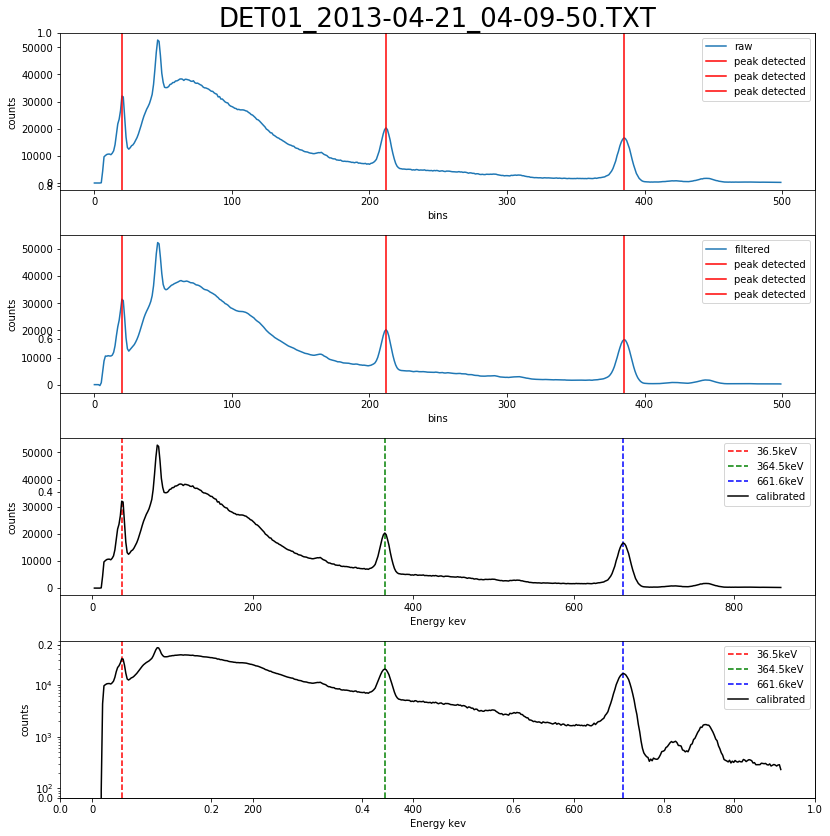

In [23]:
def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]

def plot_calibrated_file(filedir, filename, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    plot_calibration(counts, new_E_scale, 500, filename, os.path.join(outdir, filename)+'.png')
    
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

for i, fn in enumerate(files[1200:]):
    if not (1200+i)%100: print(i+1200)
    plot_calibrated_file(hourly_files_dir, fn, 'hourly_calib_plots') 

## Peaks

In [24]:
counts = counts_all[196,:]

In [25]:
counts

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [26]:
print counts.shape
print energy.shape
print new_E_scale.shape

(2048L,)


NameError: name 'energy' is not defined

In [27]:
b = corresponding_energies[0]

In [28]:
def fwhm3(valuelist, peakpos=-1):
    #from https://www.mantidproject.org/Python_Peak_Methods
    """calculates the full width at half maximum (fwhm) of some curve.

    the function will return the fwhm with sub-pixel interpolation. It will start at the maximum position and 'walk' left and right until it approaches the half values.

    INPUT: 
    - valuelist: e.g. the list containing the temporal shape of a pulse 

    OPTIONAL INPUT: 
    -peakpos: position of the peak to examine (list index)
    the global maximum will be used if omitted.

    OUTPUT:
    -fwhm (value)
    """
    if peakpos== -1: #no peakpos given -> take maximum
        peak = numpy.max(valuelist)
        peakpos = numpy.min( numpy.nonzero( valuelist==peak  )  )

    peakvalue = valuelist[peakpos]
    phalf = peakvalue / 2.0

    # go left and right, starting from peakpos
    ind1 = peakpos
    ind2 = peakpos   

    while ind1>2 and valuelist[ind1]>phalf:
        ind1=ind1-1
    while ind2<len(valuelist)-1 and valuelist[ind2]>phalf:
        ind2=ind2+1  
    #ind1 and 2 are now just below phalf
    grad1 = valuelist[ind1+1]-valuelist[ind1]
    grad2 = valuelist[ind2]-valuelist[ind2-1]
    #calculate the linear interpolations
    p1interp= ind1 + (phalf -valuelist[ind1])/grad1
    p2interp= ind2 + (phalf -valuelist[ind2])/grad2
    #calculate the width
    width = p2interp-p1interp
    return width

In [29]:
from lmfit.models import GaussianModel

In [30]:
import numpy
def gauss(x, mu, sigma):
    return numpy.exp(-(x-mu)**2/2./sigma**2)


In [31]:


def get_peak_81_poc(energy, counts, scalepoly):

    #energy range we want
    e0 = corresponding_energies[0]
    e1 = 2*e0
    
    #bins in new energy scale
    b0 = numpy.digitize(e0, energy)
    b1 = numpy.digitize(e1, energy)
    
    #bin of minima
    minbin = b0+numpy.argmin(counts[b0:b1])
    #bin of minima + 10keV
    minbinp10 = numpy.digitize(energy[minbin]+20, energy)
    
    bin90 = numpy.digitize(90, energy)
    bin110 = numpy.digitize(110, energy)
    
    #print minbin, minbinp10, bin90, bin110
    #print energy[minbin:minbinp10],  energy[bin90:bin110]
    
    #do polyfit
    x = numpy.hstack((energy[minbin:minbinp10], energy[bin90:bin110]))
    #print x
    y = numpy.hstack((counts[minbin:minbinp10], counts[bin90:bin110]))
    
    
    y_savgol =  numpy.hstack((savgol_filter(counts[minbin:minbinp10], 5, 1), savgol_filter(counts[bin90:bin110], 5, 1)))
    #print y
    z = numpy.polyfit(x, y, 3)
    
    #get it as a polynom
    trans_p1 = numpy.poly1d(z)
    
    #estimated background
    BKG = trans_p1(energy[minbin:bin110])
    #tru counts
    TC = counts[minbin:bin110]
    
    #subtract background
    peak_diff =TC-BKG
    
    peakpos = numpy.argmax(peak_diff)
    peakmax = numpy.max(peak_diff)

    ##fit gaussian
    x_g = energy[minbin+peakpos-3:minbin+peakpos+3+1:]
    y_g = counts[minbin+peakpos-3:minbin+peakpos+3+1:]

    mod = GaussianModel()
    pars = mod.guess(y_g, x=x_g)
    print pars
    fwhm = pars['fwhm']._val
    sigma = pars['sigma']._val
    amplitude = pars['amplitude']._val
    center = pars['center']._val
    print center, sigma, fwhm, peakmax
    
    #print(out.fit_report(min_correl=0.25))
    
    #get the FWHM
    #FWHM = fwhm3(peak_diff)
    #tFWHM = scalepoly(FWHM)

    plot_peak(energy[:100], counts[:100], energy[minbin:bin110], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm)
    return peakmax, pars, peakpos #tFWHM

def plot_peak(energy_full, counts_full, energy, peakpos, counts, x, counts_fit, counts_savgol, peak_diff, tFWHM, 
              filename=None, mu=None, sigma=None, norm=1.):    
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(211)
    ax.plot(energy_full, counts_full, label='counts')
    ax.plot(x,counts_savgol, label='savgol counts')
    ax.plot(energy, counts_fit, label='fit')
    plt.legend()
    ax = fig.add_subplot(212)
    ax.plot(energy, peak_diff)
    ax.axvline(energy[peakpos], color='r', label='peak')
    print energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2
    ax.axvspan(energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2, facecolor='g', alpha=0.5, label='FWHM')
    plt.legend()
    
    if not mu is None and not sigma is None:  # mu = peakpos
        ax.plot(energy, gauss(energy, mu, sigma, norm))
        
        
    
    if filename:
        plt.savefig('%s.pdf' % filename)
        

import numpy
def gauss(x, mu, sigma, norm=1):
    #print x
    #print mu, sigma
    ret = numpy.exp(-(x-mu)**2/2./sigma**2)
    #print(ret)
    return ret * norm

Parameters([('sigma', <Parameter 'sigma', 3.3834513285544219, bounds=[0.0:inf]>), ('center', <Parameter 'center', 82.181806640872253, bounds=[-inf:inf]>), ('amplitude', <Parameter 'amplitude', 10170.654693634593, bounds=[-inf:inf]>), ('fwhm', <Parameter 'fwhm', 7.9674188575065239, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', 1199.2205538000003, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1.e-15, sigma)'>)])
82.1818066409 3.38345132855 7.96741885751 1007.91953148
76.5063787194 84.4737975769


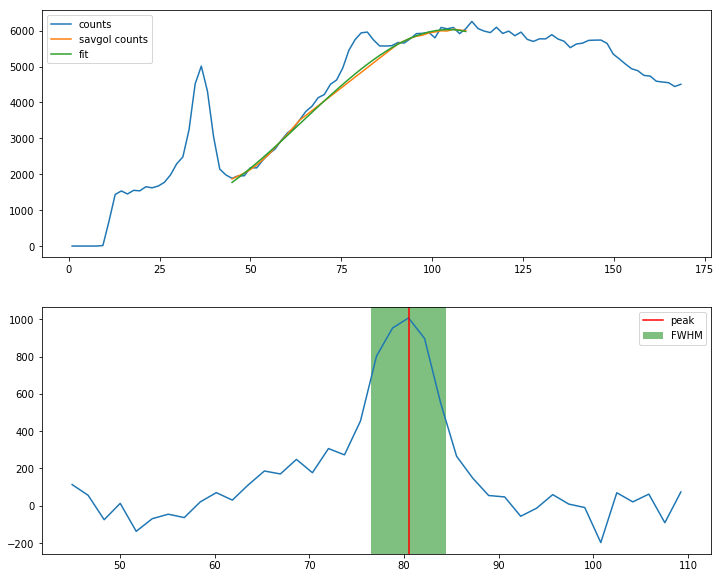

In [32]:
a, out, pos = get_peak_81_poc(new_E_scale, counts, trans_p)

In [32]:
out.__dict__

{'_OrderedDict__map': {'amplitude': [[[[[[[...], [...], 'fwhm'],
       [...],
       'height'],
      [...],
      None],
     [...],
     'sigma'],
    [...],
    'center'],
   [[...],
    [[...],
     [[...], [[...], [[...], [...], 'center'], 'sigma'], None],
     'height'],
    'fwhm'],
   'amplitude'],
  'center': [[[[[[[...], [...], 'amplitude'], [...], 'fwhm'], [...], 'height'],
     [...],
     None],
    [...],
    'sigma'],
   [[...],
    [[...], [[...], [[...], [[...], [...], 'sigma'], None], 'height'], 'fwhm'],
    'amplitude'],
   'center'],
  'fwhm': [[[[[[[...], [...], 'height'], [...], None], [...], 'sigma'],
     [...],
     'center'],
    [...],
    'amplitude'],
   [[...],
    [[...],
     [[...], [[...], [[...], [...], 'amplitude'], 'center'], 'sigma'],
     None],
    'height'],
   'fwhm'],
  'height': [[[[[[[...], [...], None], [...], 'sigma'], [...], 'center'],
     [...],
     'amplitude'],
    [...],
    'fwhm'],
   [[...],
    [[...],
     [[...], [[...], [[..

## Pipeline - deprecated?

https://lmfit.github.io/lmfit-py/builtin_models.html#example-1-fit-peaked-data-to-gaussian-lorentzian-and-voigt-profiles

In [33]:
def get_peak_81_poc(energy, counts, scalepoly, filename):
    "finds the peak and calculated its FWHM"
    #energy range we want
    e0 = corresponding_energies[0]
    e1 = 2*e0
    #bins in new energy scale
    b0 = numpy.digitize(e0, energy)
    b1 = numpy.digitize(e1, energy)
    #bin of minima
    minbin = b0+numpy.argmin(counts[b0:b1])
    #bin of minima + 10keV
    minbinp10 = numpy.digitize(energy[minbin]+10, energy)
    bin90 = numpy.digitize(90, energy)
    bin110 = numpy.digitize(110, energy)
    
    #do polyfit
    x = numpy.hstack((energy[minbin:minbinp10], energy[bin90:bin110]))
    
    y = numpy.hstack((counts[minbin:minbinp10], counts[bin90:bin110]))
    y_savgol =  numpy.hstack((savgol_filter(counts[minbin:minbinp10], 5, 1), savgol_filter(counts[bin90:bin110], 5, 1)))
    
    z = numpy.polyfit(x, y, 3)
    print filename, z
    #get it as a polynom
    trans_p1 = numpy.poly1d(z)
    #estimated background
    BKG = trans_p1(energy[minbin:bin110])
    #tru counts
    TC = counts[minbin:bin110]
    #subtract background
    peak_diff =TC-BKG
    peakpos = numpy.argmax(peak_diff)
    peakmax = numpy.max(peak_diff)
    #get the FWHM
    
    ##fit gaussian
    x_g = energy[minbin+peakpos-3:minbin+peakpos+3+1:]
    y_g = counts[minbin+peakpos-3:minbin+peakpos+3+1:]

    mod = GaussianModel()
    pars = mod.guess(y_g, x=x_g)
    print pars
    fwhm = pars['fwhm']._val
    sigma = pars['sigma']._val
    amplitude = pars['amplitude']._val
    center = pars['center']._val
    print "=========", center, sigma, fwhm, peakmax
    
    
    #peak_diff_pos = numpy.where(peak_diff>0, peak_diff, 0)
    #tFWHM = scalepoly(fwhm3(peak_diff_pos))
    plot_peak(energy[:100], counts[:100], energy[minbin:bin110], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename)
    return peakmax, fwhm, peakpos


def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)
        

def process_file(filedir, filename, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    peakmax, fwhm, peakpos = get_peak_81_poc(new_E_scale, counts, scalepoly, filename)
    ##BOXPLOT write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    return peakpos, peakmax
   

In [ ]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

peak_81_boxdata = []

for fn in files[:10]:
    
    peakpos, count = process_file(hourly_files_dir, fn, 'hourly_calib')
    peak_81_boxdata.append((peakpos, count))

## Fit example

In [35]:
x_g = numpy.array([ 75.41480358,  77.10657945,  78.79834097,  80.49008815,  82.18182098, 83.87353948,  85.56524363])
y_g = numpy.array([ 4959.,  5454.,  5747.  ,5939.,  5961.,  5742.,  5575.,])
mod = GaussianModel()

pars = mod.guess(y_g, x=x_g)

print pars

Parameters([('sigma', <Parameter 'sigma', 3.3834513299999998, bounds=[0.0:inf]>), ('center', <Parameter 'center', 82.181806641999998, bounds=[-inf:inf]>), ('amplitude', <Parameter 'amplitude', 10170.654697979999, bounds=[-inf:inf]>), ('fwhm', <Parameter 'fwhm', 7.9674188609106, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', 1199.2205538000001, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1.e-15, sigma)'>)])


In [36]:
a = pars['fwhm']._val
print a

7.96741886091


In [37]:
a

7.9674188609106

## 364.5 keV Peak

In [38]:
def get_peak_364_poc(energy, counts, filename=None, plot=False):

    #energy range we want
    try:
        bin325 = numpy.digitize(325, energy)
        bin342 = numpy.digitize(342, energy)
    
        bin387 = numpy.digitize(387, energy)
        bin404 = numpy.digitize(404, energy)
    except:
        print filename
        return 0, 0, 0, 0, [0,0,0,0]
    else:

        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))


        y_savgol =  numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        peakpos = numpy.argmax(peak_diff)
        peakmax = numpy.max(peak_diff)

        ##fit gaussian
        peak_delta = 8
        x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta+1:]
        y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta+1:]
        y_g = numpy.where(y_g > 0., y_g, 0.)

        mod = GaussianModel()
        pars = mod.guess(y_g, x=x_g)
        print pars
        fwhm = pars['fwhm']._val
        sigma = pars['sigma']._val
        amplitude = pars['amplitude']._val
        center = pars['center']._val
        #print center, sigma, fwhm, peakmax

        if plot:
            plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                      mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)
        return peakmax, fwhm, center, sigma, z



In [43]:
import numpy
def gauss(x, mu, sigma, norm=1):
    #print x
    #print mu, sigma
    ret = numpy.exp(-(x-mu)**2/2./sigma**2)
    #print(ret)
    return ret * norm

Parameters([('sigma', <Parameter 'sigma', 5.9126814018212315, bounds=[0.0:inf]>), ('center', <Parameter 'center', 363.65529537064003, bounds=[-inf:inf]>), ('amplitude', <Parameter 'amplitude', 22811.124848226311, bounds=[-inf:inf]>), ('fwhm', <Parameter 'fwhm', 13.923300418636673, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', 1539.1193934, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1.e-15, sigma)'>)])
357.538349791 371.461650209
[-0.00050385161170140365, 0.564267888869325, -215.55178997295084, 28956.932858485121]


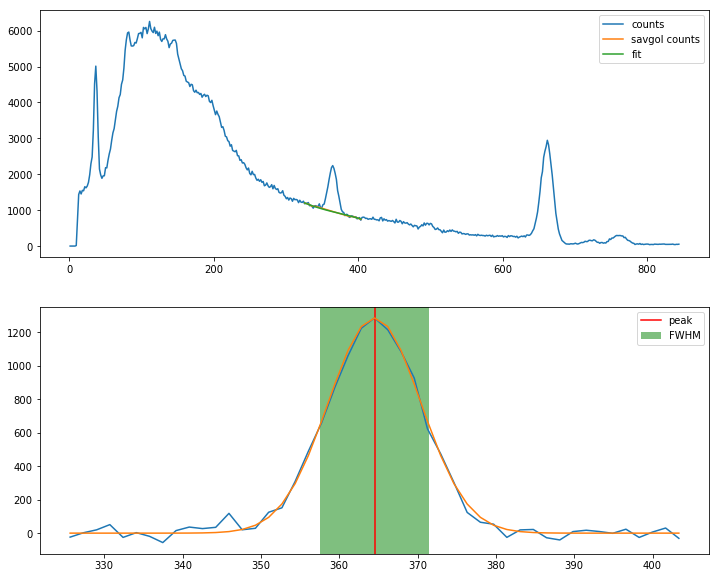

In [44]:
peakmax, fwhm, center, sigma, z = get_peak_364_poc(new_E_scale, counts, plot=True)
print(list(z))

### Pipeline

In [45]:
def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, outpath):
    lines = []
    lines.append(filename+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % (peakmax, fwhm, center, sigma))
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    peakmax, fwhm, center, sigma, z_poly = get_peak_364_poc(new_E_scale, counts, filename)
    ##BOXPLOT write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    ##BOXPLOT write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, os.path.join(outdir, 'peak_364', 'peaks_364.txt'))
    return peakmax, center

In [ ]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

peak_364_boxplots = []

for fi, fn in enumerate(files[:]):
    if not fi % 100: print(fi, fn)
    peakmax, center = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
    peak_364_boxplots.append((center, peakmax))

In [ ]:
peak_364_boxplots = numpy.array(peak_364_boxplots)
peak_364_boxplots.shape
scipy.io.savemat('boxplots.m', {"p364": peak_364_boxplots})

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(peak_364_boxplots[:,1], showfliers=False)

# 364 BETTER - grid optim

In [68]:
def get_peak_364_poc(energy, counts, filename=None, plot=False):
    new_scale = numpy.linspace(energy[0], energy[-1], 2048*3)
    #print(new_scale)
    new_counts = griddata(energy, counts, (new_scale,), method='linear')
    #print(new_counts)

    #bin325 = numpy.digitize(225, new_scale)
    #bin342 = numpy.digitize(235, new_scale)

    #bin387 = numpy.digitize(270, new_scale)
    #bin404 = numpy.digitize(280, new_scale)

    energy = new_scale
    counts = new_counts

    
    #energy range we want
    try:
        bin325 = numpy.digitize(325, energy)
        bin342 = numpy.digitize(342, energy)
    
        bin387 = numpy.digitize(387, energy)
        bin404 = numpy.digitize(404, energy)
    except:
        print filename
        return 0, 0, 0, 0, [0,0,0,0]
    else:

        
        
        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))


        y_savgol =  numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        peakpos_c = numpy.argmax(peak_diff)
        peakmax = numpy.max(peak_diff)


        
        def fitt(peakpos, peakmax, peak_delta):
            x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
            y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
            y_g = numpy.where(y_g > 0., y_g, 0.)

            mod = GaussianModel()
            pars = mod.guess(y_g, x=x_g)
            #print(pars)
            pars.__repr__()
            fwhm = pars['fwhm']._val
            sigma = pars['sigma']._val
            amplitude = pars['amplitude']._val
            center = pars['center']._val
            #print center, sigma, fwhm, peakmax


            #difference in peka diff and data
            curve_1 = peak_diff  # [bin240-bin325: bin270-bin325]
            curve_2 = gauss(energy[bin325:bin404], energy[bin325:bin404][peakpos], sigma, peakmax)  # [bin240-bin325: bin270-bin325]
            numdiff = numpy.sum((curve_1-curve_2)**2)
            #print('===Difference: peakdelta=%d,  %5.4f,  %5.4f, diff=%4.5e' % (peak_delta, peakpos, peakmax, numdiff))
            return numdiff, fwhm, sigma, amplitude, center

        diff_vector = []
        fit_params = []
        
        try_delta = 12
        try_peak_delta = 24
        for peakpos in range(max(0,peakpos_c-try_delta), min(peak_diff.shape[0], peakpos_c+try_delta+1)):
            ##fit gaussian
            
            
            if peak_diff[peakpos] > 0:
                peakmax = peak_diff[peakpos]
                for peak_delta in range(6, try_peak_delta):
                    numdiff, fwhm, sigma, amplitude, center = fitt(peakpos, peakmax, peak_delta)
                    diff_vector.append(numdiff)
                    fit_params.append((peakpos, peakmax, peak_delta))

        diff_vector = numpy.array(diff_vector)
        
        peakpos, peakmax, peak_delta = fit_params[numpy.argmin(diff_vector)]
        
        numdiff, fwhm, sigma, amplitude, center = fitt(peakpos, peakmax, peak_delta)
        
        
        if plot:
            plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                      mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)
        return peakmax, fwhm, center, sigma, z
    



#### pipeline

In [70]:
def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, outpath):
    lines = []
    lines.append(filename+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % (peakmax, fwhm, center, sigma))
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    peakmax, fwhm, center, sigma, z_poly = get_peak_364_poc(new_E_scale, counts, filename)
    write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, os.path.join(outdir, 'peak_364', 'peaks_364_gridoptim.txt'))
    return peakmax, center

In [72]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

peak_364_boxplots = []

for fi, fn in enumerate(files[:]):
    if not fi % 100: print(fi, fn)
    try:
        peakmax, center = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
        peak_364_boxplots.append((center, peakmax))
    except:
        print('Error in file %s' % fn)

(0, 'DET01_2013-03-01_09-08-39.TXT')
(100, 'DET01_2013-03-05_13-55-25.TXT')
(200, 'DET01_2013-03-09_18-51-38.TXT')
(300, 'DET01_2013-03-13_23-39-44.TXT')
(400, 'DET01_2013-03-18_04-30-38.TXT')
(500, 'DET01_2013-03-22_09-24-25.TXT')
(600, 'DET01_2013-03-26_14-18-29.TXT')
Error in file DET01_2013-03-28_13-45-43.TXT
(700, 'DET01_2013-03-30_19-17-52.TXT')
(800, 'DET01_2013-04-04_00-52-11.TXT')
(900, 'DET01_2013-04-08_05-41-50.TXT')
(1000, 'DET01_2013-04-12_10-31-25.TXT')
(1100, 'DET01_2013-04-16_15-18-35.TXT')
(1200, 'DET01_2013-04-20_20-06-02.TXT')
(1300, 'DET01_2013-04-25_01-02-53.TXT')
(1400, 'DET01_2013-04-29_05-50-36.TXT')
(1500, 'DET01_2013-05-03_11-28-52.TXT')
(1600, 'DET01_2013-05-07_16-18-22.TXT')
(1700, 'DET01_2013-05-11_21-09-45.TXT')
(1800, 'DET01_2013-05-16_02-01-30.TXT')
(1900, 'DET01_2013-05-20_07-01-21.TXT')
(2000, 'DET01_2013-05-24_11-53-04.TXT')
(2100, 'DET01_2013-05-28_16-40-43.TXT')
(2200, 'DET01_2013-06-01_22-19-27.TXT')
(2300, 'DET01_2013-06-06_03-07-16.TXT')
(2400, '

# 250keV

In [47]:
def get_peak_250_poc(energy, counts, filename=None, plot=False):

    #energy range we want
    try:
        bin325 = numpy.digitize(225, energy)
        bin342 = numpy.digitize(235, energy)
    
        bin387 = numpy.digitize(270, energy)
        bin404 = numpy.digitize(280, energy)
    except:
        print filename
        return 0, 0, 0, 0, [0,0,0,0]
    else:

        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))


        y_savgol =  numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        peakpos = numpy.argmax(peak_diff)
        peakmax = numpy.max(peak_diff)

        ##fit gaussian
        peak_delta = 6
        x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
        y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
        y_g = numpy.where(y_g > 0., y_g, 0.)

        mod = GaussianModel()
        pars = mod.guess(y_g, x=x_g)
        print pars
        fwhm = pars['fwhm']._val
        sigma = pars['sigma']._val
        amplitude = pars['amplitude']._val
        center = pars['center']._val
        #print center, sigma, fwhm, peakmax

        if plot:
            plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                      mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)
        return peakmax, fwhm, center, sigma, z



#### pipeline

In [ ]:
def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, outpath):
    lines = []
    lines.append(filename+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % (peakmax, fwhm, center, sigma))
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    peakmax, fwhm, center, sigma, z_poly = get_peak_250_poc(new_E_scale, counts, filename, plot=True)
    write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    #write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, os.path.join(outdir, 'peak_250', 'peaks_250_delta6.txt'))
    
    return center, peakmax

In [ ]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

print("hohoho", files.index('DET01_2013-07-19_19-57-18.TXT'))

examples = ['DET01_2013-03-29_06-56-16.TXT','DET01_2013-07-19_19-57-18.TXT','DET01_2013-07-05_21-06-10.TXT']

peak250_boxplot = []

for fi, fn in enumerate(examples):  # files[:]): #['DET01_2013-07-19_19-57-18.TXT']): ##files[:]):
    if not fi % 100: print(fi, fn)
    center, peakmax = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
    peak250_boxplot.append((center, peakmax))

In [ ]:
peak250_boxplot = numpy.array(peak250_boxplot)
print(peak250_boxplot.shape)
scipy.io.savemat('boxplots.m', {"p364": peak_364_boxplots,
                                "p250": peak250_boxplot})

## 250 keV BETTER

In [63]:
from scipy.interpolate import griddata

def get_peak_250_fine(energy, counts, filename=None, plot=False):

    
    
    
    new_scale = numpy.linspace(energy[0], energy[-1], 2048*3)
    #print(new_scale)
    new_counts = griddata(energy, counts, (new_scale,), method='linear')
    #print(new_counts)

    #bin325 = numpy.digitize(225, new_scale)
    #bin342 = numpy.digitize(235, new_scale)

    #bin387 = numpy.digitize(270, new_scale)
    #bin404 = numpy.digitize(280, new_scale)

    energy = new_scale
    counts = new_counts

    
    #energy range we want
    try:
        bin325 = numpy.digitize(225, energy)
        bin342 = numpy.digitize(235, energy)
    
        bin240 = numpy.digitize(240, energy)
        bin270 = numpy.digitize(270, energy)
    
        bin387 = numpy.digitize(265, energy)
        bin404 = numpy.digitize(273, energy)
    except:
        print filename
        return 0, 0, 0, 0, [0,0,0,0]
    else:

        
        
        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))


        y_savgol =  numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        peakpos_c = numpy.argmax(peak_diff)
        peakmax = numpy.max(peak_diff)


        
        def fitt(peakpos, peakmax, peak_delta):
            x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
            y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
            y_g = numpy.where(y_g > 0., y_g, 0.)

            mod = GaussianModel()
            pars = mod.guess(y_g, x=x_g)
            #print(pars)
            pars.__repr__()
            fwhm = pars['fwhm']._val
            sigma = pars['sigma']._val
            amplitude = pars['amplitude']._val
            center = pars['center']._val
            #print center, sigma, fwhm, peakmax


            #difference in peka diff and data
            curve_1 = peak_diff  # [bin240-bin325: bin270-bin325]
            curve_2 = gauss(energy[bin325:bin404], energy[bin325:bin404][peakpos], sigma, peakmax)  # [bin240-bin325: bin270-bin325]
            numdiff = numpy.sum((curve_1-curve_2)**2)
            #print('===Difference: peakdelta=%d,  %5.4f,  %5.4f, diff=%4.5e' % (peak_delta, peakpos, peakmax, numdiff))
            return numdiff, fwhm, sigma, amplitude, center

        diff_vector = []
        fit_params = []
        
        try_delta = 12
        try_peak_delta = 24
        for peakpos in range(max(0,peakpos_c-try_delta), min(peak_diff.shape[0], peakpos_c+try_delta+1)):
            ##fit gaussian
            
            
            if peak_diff[peakpos] > 0:
                peakmax = peak_diff[peakpos]
                for peak_delta in range(6, try_peak_delta):
                    numdiff, fwhm, sigma, amplitude, center = fitt(peakpos, peakmax, peak_delta)
                    diff_vector.append(numdiff)
                    fit_params.append((peakpos, peakmax, peak_delta))

        diff_vector = numpy.array(diff_vector)
        
        peakpos, peakmax, peak_delta = fit_params[numpy.argmin(diff_vector)]
        
        numdiff, fwhm, sigma, amplitude, center = fitt(peakpos, peakmax, peak_delta)
        
        
        if plot:
            plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                      mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)
        return peakmax, fwhm, center, sigma, z



#### pipeline

In [64]:
def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, outpath):
    lines = []
    lines.append(filename+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % (peakmax, fwhm, center, sigma))
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    peakmax, fwhm, center, sigma, z_poly = get_peak_250_fine(new_E_scale, counts, filename, plot=False)
    write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, os.path.join(outdir, 'peak_250', 'peaks_250_grid_6144_newrange.txt'))
    
    return center, peakmax

In [66]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

print("hohoho", files.index('DET01_2013-07-19_19-57-18.TXT'))

problem_BKG = ['DET01_2013-05-23_18-44-25.TXT']  # For 23/05/2013 @ 18:44:25']

examples = ['DET01_2013-03-29_06-56-16.TXT','DET01_2013-07-19_19-57-18.TXT','DET01_2013-07-05_21-06-10.TXT']

peak250_boxplot = []

for fi, fn in enumerate(files[:]): #['DET01_2013-07-19_19-57-18.TXT']): ##files[:]):
    if not fi % 100: print(fi, fn)
    try:    
        center, peakmax = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
        peak250_boxplot.append((center, peakmax))
    except:
        print('Failed:', fn)

('hohoho', 3339)
(0, 'DET01_2013-03-01_09-08-39.TXT')
(100, 'DET01_2013-03-05_13-55-25.TXT')
(200, 'DET01_2013-03-09_18-51-38.TXT')
(300, 'DET01_2013-03-13_23-39-44.TXT')
(400, 'DET01_2013-03-18_04-30-38.TXT')
(500, 'DET01_2013-03-22_09-24-25.TXT')
(600, 'DET01_2013-03-26_14-18-29.TXT')
('Failed:', 'DET01_2013-03-28_13-45-43.TXT')
(700, 'DET01_2013-03-30_19-17-52.TXT')
(800, 'DET01_2013-04-04_00-52-11.TXT')
(900, 'DET01_2013-04-08_05-41-50.TXT')
(1000, 'DET01_2013-04-12_10-31-25.TXT')
(1100, 'DET01_2013-04-16_15-18-35.TXT')
(1200, 'DET01_2013-04-20_20-06-02.TXT')
(1300, 'DET01_2013-04-25_01-02-53.TXT')
(1400, 'DET01_2013-04-29_05-50-36.TXT')
(1500, 'DET01_2013-05-03_11-28-52.TXT')
(1600, 'DET01_2013-05-07_16-18-22.TXT')
(1700, 'DET01_2013-05-11_21-09-45.TXT')
(1800, 'DET01_2013-05-16_02-01-30.TXT')
(1900, 'DET01_2013-05-20_07-01-21.TXT')
(2000, 'DET01_2013-05-24_11-53-04.TXT')
(2100, 'DET01_2013-05-28_16-40-43.TXT')
(2200, 'DET01_2013-06-01_22-19-27.TXT')
(2300, 'DET01_2013-06-06_03-07

## 661.6 keV Peak Cesium

In [ ]:
def get_peak_662_poc(energy, counts, filename=None, plot=False):

    #energy range we want
    try:
        bin325 = numpy.digitize(615, energy)
        bin342 = numpy.digitize(631.6, energy)
    
        bin387 = numpy.digitize(691.6, energy)
        bin404 = numpy.digitize(707, energy)
    except:
        print filename
        return 0, 0, 0, 0, [0,0,0,0]
    else:

        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))


        y_savgol =  numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        peakpos = numpy.argmax(peak_diff)
        peakmax = numpy.max(peak_diff)

        ##fit gaussian
        peak_delta = 10
        x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta+1:]
        y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta+1:]
        y_g = numpy.where(y_g > 0., y_g, 0.)

        mod = GaussianModel()
        pars = mod.guess(y_g, x=x_g)
        print pars
        fwhm = pars['fwhm']._val
        sigma = pars['sigma']._val
        amplitude = pars['amplitude']._val
        center = pars['center']._val
        #print center, sigma, fwhm, peakmax

        if plot:
            plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                      mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)
        return peakmax, fwhm, center, sigma, z


In [ ]:
peakmax, fwhm, center, sigma, z = get_peak_662_poc(new_E_scale, counts,  plot=True)

### Pipeline

In [ ]:
def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, outpath):
    lines = []
    lines.append(filename+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % (peakmax, fwhm, center, sigma))
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    peakmax, fwhm, center, sigma, z_poly = get_peak_662_poc(new_E_scale, counts, filename, plot=False)
    ##BOXPLOT write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    ##BOXPLOT write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, os.path.join(outdir, 'peak_662', 'peaks_662.txt'))
    
    return center, peakmax 

In [ ]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

peak662_boxplot = []

for fi, fn in enumerate(files[:]):
    if not fi % 100: print(fi, fn)
    center, peakmax = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
    peak662_boxplot.append((center, peakmax))

In [ ]:
peak662_boxplot = numpy.array(peak662_boxplot)
print(peak662_boxplot.shape)
scipy.io.savemat('boxplots.m', {"p364": peak_364_boxplots,
                                "p250": peak250_boxplot,
                                "p662": peak662_boxplot})

## Peak 661.6 again finally used (before grid method)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn import mixture
import math
import numpy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore", category=VisibleDeprecationWarning)

def get_fwhm(sigma):
    """
    taken from http://mathworld.wolfram.com/GaussianFunction.html    
    """
    return 2.3548*sigma
    

def gauss_n(x, mu, sigma, norm=1):
    "also with norlalization factor - the normal one"
    

    #print x
    #print mu, sigma
    ret = 1./(math.sqrt(2*math.pi)*sigma) *numpy.exp(-(x-mu)**2/2./sigma**2)
    #print(ret)
    return ret * norm


def get_peak_twin_poc(energy, counts, filename=None, plot=False):
    #energy range we want
    try:
        bin325 = numpy.digitize(590, energy)
        bin342 = numpy.digitize(605, energy)
    
        bin387 = numpy.digitize(691.6, energy)
        bin404 = numpy.digitize(707, energy)        
    except:
        print filename
        return (0, 0, 0, 0), (0, 0, 0, 0), [0,0,0,0]
    else:

        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))

        y_savgol = numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        import scipy.signal
        armgs = scipy.signal.argrelextrema(peak_diff, numpy.greater)

        peak_tuples = zip(armgs[0], peak_diff[armgs[0]])
        all_peaks = sorted(peak_tuples, key=lambda x: x[1], reverse=True)[:2]
        all_peaks = sorted(all_peaks, key=lambda x: x[0])
        #print armgs[0]
        #print peak_diff[armgs[0]]
        #print peak_tuples
        #print all_peaks
        peakpos1 = all_peaks[0][0]
        peakmax1 = all_peaks[0][1]
        peakpos2 = all_peaks[1][0]
        peakmax2 = all_peaks[1][1]
            
        print peakmax1, peakmax2, max(peakmax1, peakmax2)/min(peakmax1, peakmax2)   
        if (max(peakmax1, peakmax2)/min(peakmax1, peakmax2) >= 10.) \
           or \
           (abs(energy[peakpos1]-energy[peakpos2]) <= 5.): 
            print("One peak")
            #energy range we want
            try:
                bin325 = numpy.digitize(590, energy)  # numpy.digitize(615, energy)
                bin342 = numpy.digitize(605, energy)  # numpy.digitize(631.6, energy)

                bin387 = numpy.digitize(691.6, energy)
                bin404 = numpy.digitize(707, energy)
            except:
                print filename
                return 0, 0, 0, 0, [0,0,0,0]
            else:

                #do polyfit
                x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
                #print x
                y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))


                y_savgol =  numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
                z = numpy.polyfit(x, y, 3)

                #get it as a polynom
                trans_p1 = numpy.poly1d(z)

                #estimated background
                BKG = trans_p1(energy[bin325:bin404])
                #tru counts
                TC = counts[bin325:bin404]

                #subtract background
                peak_diff =TC-BKG

                peakpos = numpy.argmax(peak_diff)
                peakmax = numpy.max(peak_diff)

                ##fit gaussian
                peak_delta = 10
                x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta+1:]
                y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta+1:]
                y_g = numpy.where(y_g > 0., y_g, 0.)

                mod = GaussianModel()
                pars = mod.guess(y_g, x=x_g)
                print pars
                fwhm = pars['fwhm']._val
                sigma = pars['sigma']._val
                amplitude = pars['amplitude']._val
                center = pars['center']._val
                #print center, sigma, fwhm, peakmax

                if plot:
                    plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                              mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)
                
                return (0,0,0,0), (peakmax, fwhm, center, sigma), z
            
        else:
            print("Two peaks")
    
            peakpos = numpy.argmax(peak_diff)
            peakmax = numpy.max(peak_diff)

            ##fit gaussian
            peak_delta = 10
            x_g = energy[bin325+peakpos-3.*peak_delta:bin325+peakpos+int(1.5*peak_delta)+1]
            #y_g = counts[bin325+peakpos-3.*peak_delta:bin325+peakpos+peak_delta+1:]
            y_g = peak_diff[peakpos-3.*peak_delta:peakpos+int(1.5*peak_delta)+1]
            y_g = numpy.where(y_g > 0., y_g, 0.)

            y_g0 = y_g
            g = []
            for i in range(len(y_g)):
                for j in range(int(y_g0[i])):
                    g.append([x_g[i]])  # sklearn wants it as a [[1][2]..]


            samples = numpy.array(g)

            gmix = mixture.GMM(n_components=2) #, covariance_type='full')
            gmix.fit(samples)

            p = [(gmix.means_[0, 0], math.sqrt(gmix.covars_[0, 0])), #mean, sigma
                 (gmix.means_[1, 0], math.sqrt(gmix.covars_[1, 0]))]  #mean, sigma
            p = sorted(p, key=lambda x: x[0])

            mu1 = p[0][0]
            mu2 = p[1][0]
            sigma1 = p[0][1]
            sigma2 = p[1][1]
            fwhm1 = get_fwhm(sigma1)
            fwhm2 = get_fwhm(sigma2)

            if plot:
                plot_two_peaks(energy[:500], counts[:500], energy[bin325:bin404], [peakpos1, peakpos2], TC, x, BKG, y_savgol, peak_diff, gmix, 
                             filename, [peakmax1, peakmax2], [sigma1, sigma2], [mu1, mu2])

            #energy_full = energy[:500]
            #counts_full = counts[:500]
            #energy = energy[bin325:bin404]
            #counts_savgol = y_savgol
            #counts_fit = TC

            #print "GMM", gmix.means_
            #print "GMM", gmix.covars_
            #print "GMM", gmix.weights_      
            return (peakmax1, fwhm1, energy[bin325+peakpos1], sigma1), (peakmax2, fwhm2, energy[bin325+peakpos2], sigma2), z

        
def plot_two_peaks(energy_full, counts_full, energy, peakpos, counts, x, counts_fit, counts_savgol, peak_diff, gmix,
                      filename=None, peakmax=[1.,1.], sigma=[1., 1.], mu=[1.,1.]):        
      
    #print filename        
    fig = plt.figure(figsize=(12,14))
    ax = fig.add_subplot(311)
    ax.plot(energy_full, counts_full, label='counts')
    ax.plot(x,counts_savgol, label='savgol counts')
    ax.plot(energy, counts_fit, label='fit')
    plt.legend()
    ax = fig.add_subplot(312)
    ax.plot(energy, peak_diff)
    for ppos in peakpos:
        ax.axvline(energy[ppos], color='r', label='peak')
    #print energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2
    #ax.axvspan(energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2, facecolor='g', alpha=0.5, label='FWHM')
    plt.legend()

    #max_peak_index = numpy.argmax(gmix.means_[:,0])  # right peak is higher
    #min_peak_index = numpy.argmin(gmix.means_[:,0])  # left peak si higher
   
    #no1
    import math
    #mu1 = energy_full[numpy.digitize(gmix.means_[max_peak_index,0], energy_full)]
    #mu2 = energy_full[numpy.digitize(gmix.means_[min_peak_index,0], energy_full)]
    mu1 = mu[0] #energy[peakpos[0]]
    mu2 = mu[1] #energy[peakpos[1]]
    sigma1 = sigma[0] #math.sqrt(gmix.covars_[max_peak_index,0])
    sigma2 = sigma[1] #math.sqrt(gmix.covars_[min_peak_index,0])
    #w1 = gmix.weights_[max_peak_index]
    #w2 = gmix.weights_[min_peak_index]

    #print "main peak:", max_peak_index
    peakmax1 = peakmax[0]
    peakmax2 = peakmax[1]
    
    #print mu1, mu2, sigma1, sigma2
    
    norm1=peakmax1#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[max_peak_index,0]))/gmix.weights_[max_peak_index]
    norm2=peakmax2#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[min_peak_index,0]))/gmix.weights_[min_peak_index]
    
    #no1
    #print "plotting peak1"
    ax.plot(energy, gauss(energy, mu1, sigma1, norm1))

    #no2
    #print "plotting peak2"
    ax.plot(energy, gauss(energy, mu2, sigma2, norm2))


    ax = fig.add_subplot(313)
    #######################################################################################
    ax.plot(energy, peak_diff-gauss(energy, mu1, sigma1, norm1))
    for ppos in peakpos:
        ax.axvline(energy[ppos], color='r', label='peak')
    #print energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2
    #ax.axvspan(energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2, facecolor='g', alpha=0.5, label='FWHM')
    plt.legend()

    #max_peak_index = numpy.argmax(gmix.means_[:,0])  # right peak is higher
    #min_peak_index = numpy.argmin(gmix.means_[:,0])  # left peak si higher
   
    #no1
    import math
    #mu1 = energy_full[numpy.digitize(gmix.means_[max_peak_index,0], energy_full)]
    #mu2 = energy_full[numpy.digitize(gmix.means_[min_peak_index,0], energy_full)]
    mu1 = mu[0] #energy[peakpos[0]]
    mu2 = mu[1] #energy[peakpos[1]]
    sigma1 = sigma[0] #math.sqrt(gmix.covars_[max_peak_index,0])
    sigma2 = sigma[1] #math.sqrt(gmix.covars_[min_peak_index,0])
    #w1 = gmix.weights_[max_peak_index]
    #w2 = gmix.weights_[min_peak_index]

    #print "main peak:", max_peak_index
    peakmax1 = peakmax[0]
    peakmax2 = peakmax[1]
    
    #print mu1, mu2, sigma1, sigma2
    
    norm1=peakmax1#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[max_peak_index,0]))/gmix.weights_[max_peak_index]
    norm2=peakmax2#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[min_peak_index,0]))/gmix.weights_[min_peak_index]
    
    #no1
    #print "plotting peak1"
    ax.plot(energy, gauss(energy, mu1, sigma1, norm1))

    #no2
    #print "plotting peak2"
    ax.plot(energy, gauss(energy, mu2, sigma2, norm2))    
    #######################################################################################
    if filename:
        plt.savefig('%s.pdf' % filename)            
            


def p_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    (peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z = get_peak_twin_poc(new_E_scale, counts, filename, plot=True)
    print (peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z
    return (peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z
    #write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    #write_peak_file(peakmax, fwhm, center, sigma, z_poly, filename, fi, os.path.join(outdir, 'peak_250', 'peaks_250.txt'))
    

In [ ]:
(peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z = p_file("gigo", 'DET01_2013-05-21_08-14-09.TXT', 1, '.')

### Pipeline

In [ ]:
from datetime import datetime as dt

def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(t1, t2, z_poly, filename, fi, outpath):
    
    (peakmax1, fwhm1, peakpos1, sigma1) = t1
    (peakmax2, fwhm2, peakpos2, sigma2) = t2
    #z
    
    lines = []
    datestring = dt.strptime(filename, "DET01_%Y-%m-%d_%H-%M-%S.TXT").strftime("%d/%m/%Y %H:%M:%S")
    lines.append(datestring+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % t1)
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % t2)
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    t1, t2, z_poly = get_peak_twin_poc(new_E_scale, counts, filename, plot=False)
    #write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    ##BOXPLOT write_peak_file(t1, t2, z_poly, filename, fi, os.path.join(outdir, 'peak_twin', 'peaks_twin.txt'))
    
    if t1[0] > t2[0]:
        return t1[2], t1[0]
    else:
        return t2[2], t2[0]

In [ ]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

peak661_2_boxplots = []

for fi, fn in enumerate(files[:]):
    if not fi % 100: print(fi, fn)
    pos, value = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
    peak661_2_boxplots.append((pos, value))
    

## this ^^^ is computed for John, now do the same with 81keV peak

In [ ]:
peak661_2_boxplots = numpy.array(peak661_2_boxplots)
peak661_2_boxplots.shape
scipy.io.savemat('boxplots.m', {"p364": peak_364_boxplots,
                                "p250": peak250_boxplot,
                                "p662": peak661_2_boxplots,
                                "p81" : peak81_boxplot})

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([peak81_boxplot[:,1], peak250_boxplot[:,1], peak_364_boxplots[:,1], peak661_2_boxplots[:,1]],showfliers=False)
ax.set_xticklabels(['81keV','250keV','364keV','661.6keV'])
ax.set_xlabel('Energy')
ax.set_ylabel('Count')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([peak81_boxplot[:,1], peak250_boxplot[:,1], peak_364_boxplots[:,1], peak661_2_boxplots[:,1]],showfliers=True)
ax.set_xticklabels(['81keV','250keV','364keV','661.6keV'])
ax.set_yscale('log')
ax.set_xlabel('Energy')
ax.set_ylabel('Count')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([peak81_boxplot[:,0], peak250_boxplot[:,0], peak_364_boxplots[:,0], peak661_2_boxplots[:,0]],showfliers=False)
ax.set_xticklabels(['81keV','250keV','364keV','661.6keV'])
ax.set_xlabel('Energy')
ax.set_ylabel('position [keV]')

## Iodine 81keV NEW and simple! Jan 26 2018 - 11/6/18 augmented on gridsearch

In [3]:
import scipy.io
energy_all = scipy.io.loadmat("energy_all")["energy_all"]

In [31]:
from scipy.interpolate import griddata
from lmfit.models import GaussianModel

expected_peak_centers = (20, 211, 385)
#expected_peak_centers = (20, 115, 211, 385)
corresponding_energies = (36.5, 364.5, 661.6)  # keV
#corresponding_energies = (36.5, 284.3, 364.5, 661.6)  # keV


import numpy
def gauss(x, mu, sigma, norm=1):
    #print x
    #print mu, sigma
    ret = numpy.exp(-(x-mu)**2/2./sigma**2)
    #print(ret)
    return ret * norm

def plot_peak(energy_full, counts_full, energy, peakpos, counts, x, counts_fit, counts_savgol, peak_diff, tFWHM, 
              filename=None, mu=None, sigma=None, norm=1.):    
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(211)
    ax.plot(energy_full, counts_full, label='counts')
    ax.plot(x,counts_savgol, label='savgol counts')
    ax.plot(energy, counts_fit, label='fit')
    plt.legend()
    ax = fig.add_subplot(212)
    ax.plot(energy, peak_diff)
    ax.axvline(energy[peakpos], color='r', label='peak')
    print energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2
    ax.axvspan(energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2, facecolor='g', alpha=0.5, label='FWHM')
    plt.legend()
    
    if not mu is None and not sigma is None:  # mu = peakpos
        ax.plot(energy, gauss(energy, mu, sigma, norm))
        
        
    
    if filename:
        plt.savefig('%s.pdf' % filename)
        



"""
def plot_two_peaks(energy_full, counts_full, energy, peakpos, counts, x, counts_fit, counts_savgol, peak_diff, gmix,
                      filename=None, peakmax=[1.,1.], sigma=[1., 1.], mu=[1.,1.]):        
      
    #print filename        
    fig = plt.figure(figsize=(12,14))
    ax = fig.add_subplot(311)
    ax.plot(energy_full, counts_full, label='counts')
    ax.plot(x,counts_savgol, label='savgol counts')
    ax.plot(energy, counts_fit, label='fit')
    plt.legend()
    ax = fig.add_subplot(312)
    ax.plot(energy, peak_diff)
    for ppos in peakpos:
        ax.axvline(energy[ppos], color='r', label='peak')
    #print energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2
    #ax.axvspan(energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2, facecolor='g', alpha=0.5, label='FWHM')
    plt.legend()

    #max_peak_index = numpy.argmax(gmix.means_[:,0])  # right peak is higher
    #min_peak_index = numpy.argmin(gmix.means_[:,0])  # left peak si higher
   
    #no1
    import math
    #mu1 = energy_full[numpy.digitize(gmix.means_[max_peak_index,0], energy_full)]
    #mu2 = energy_full[numpy.digitize(gmix.means_[min_peak_index,0], energy_full)]
    
    ##mu1 = mu[0]
    ##mu2 = mu[1]
    mu1 = energy[peakpos[0]]
    mu2 = energy[peakpos[1]]
    
    sigma1 = sigma[0] #math.sqrt(gmix.covars_[max_peak_index,0])
    sigma2 = sigma[1] #math.sqrt(gmix.covars_[min_peak_index,0])
    #w1 = gmix.weights_[max_peak_index]
    #w2 = gmix.weights_[min_peak_index]

    #print "main peak:", max_peak_index
    peakmax1 = peakmax[0]
    peakmax2 = peakmax[1]
    
    #print mu1, mu2, sigma1, sigma2
    
    norm1=peakmax1#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[max_peak_index,0]))/gmix.weights_[max_peak_index]
    norm2=peakmax2#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[min_peak_index,0]))/gmix.weights_[min_peak_index]
    
    #no1
    #print "plotting peak1"
    ax.plot(energy, gauss_n(energy, mu1, sigma1, norm1))

    #no2
    #print "plotting peak2"
    ax.plot(energy, gauss_n(energy, mu2, sigma2, norm2))


    ax = fig.add_subplot(313)
    #######################################################################################
    ax.plot(energy, peak_diff-gauss_n(energy, mu1, sigma1, norm1))
    for ppos in peakpos:
        ax.axvline(energy[ppos], color='r', label='peak')
    #print energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2
    #ax.axvspan(energy[peakpos]-tFWHM/2, energy[peakpos]+tFWHM/2, facecolor='g', alpha=0.5, label='FWHM')
    plt.legend()

    #max_peak_index = numpy.argmax(gmix.means_[:,0])  # right peak is higher
    #min_peak_index = numpy.argmin(gmix.means_[:,0])  # left peak si higher
   
    #no1
    import math
    #mu1 = energy_full[numpy.digitize(gmix.means_[max_peak_index,0], energy_full)]
    #mu2 = energy_full[numpy.digitize(gmix.means_[min_peak_index,0], energy_full)]
    ##mu1 = mu[0]
    ##mu2 = mu[1]
    mu1 = energy[peakpos[0]]
    mu2 = energy[peakpos[1]]
    sigma1 = sigma[0] #math.sqrt(gmix.covars_[max_peak_index,0])
    sigma2 = sigma[1] #math.sqrt(gmix.covars_[min_peak_index,0])
    #w1 = gmix.weights_[max_peak_index]
    #w2 = gmix.weights_[min_peak_index]

    #print "main peak:", max_peak_index
    peakmax1 = peakmax[0]
    peakmax2 = peakmax[1]
    
    print "plot", mu1, mu2, sigma1, sigma2
    
    norm1=peakmax1#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[max_peak_index,0]))/gmix.weights_[max_peak_index]
    norm2=peakmax2#*(math.sqrt(2*math.pi)*math.sqrt(gmix.covars_[min_peak_index,0]))/gmix.weights_[min_peak_index]
    
    #no1
    #print "plotting peak1"
    ax.plot(energy, gauss(energy, mu1, sigma1, norm1))

    #no2
    #print "plotting peak2"
    ax.plot(energy, gauss(energy, mu2, sigma2, norm2))    
    #######################################################################################
    if filename:
        plt.savefig('%s.pdf' % filename)            
            
"""

def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    
    

def find_peaks(x, delta=15):
    #delta defines the radious
    peaks = []
    for p in expected_peak_centers:
        x0 = x[p-delta: p+delta]
        #pea = find_peaks_cwt(x0, numpy.arange(1,10))
        #print pea
        peaks.append(p-delta+x0.argmax())
        
    return numpy.array(peaks)    
    


def p_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    (peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z = get_peak_twin81_poc(new_E_scale, counts, filename, plot=True)
    print (peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z
    return (peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z

In [38]:
from scipy.signal import savgol_filter
from sklearn.mixture import GaussianMixture
from sklearn import mixture
import math
import numpy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore", category=VisibleDeprecationWarning)




def get_fwhm(sigma):
    """
    taken from http://mathworld.wolfram.com/GaussianFunction.html    
    """
    return 2.3548*sigma
    

def gauss_n(x, mu, sigma, norm=1):
    "also with norlalization factor - the normal one"
    

    #print x
    #print mu, sigma
    ret = 1./(math.sqrt(2*math.pi)*sigma) *numpy.exp(-(x-mu)**2/2./sigma**2)
    #print(ret)
    return ret * norm


def get_peak_twin81_poc(energy, counts, filename=None, plot=False):
    #subsample on 3 sub-bins
    new_scale = numpy.linspace(energy[0], energy[-1], 2048*3)
    new_counts = griddata(energy, counts, (new_scale,), method='linear')
    
    energy = new_scale
    counts = new_counts
    
    try:
        
        bin_40 = numpy.digitize(45, energy)
        bin_50 = numpy.digitize(55, energy)
        #left_min = bin_40+numpy.argmin(counts[bin_40:bin_50])
        #print "left min:", left_min, "energy:", energy[left_min], energy[left_min]
        bin75 = numpy.digitize(79, energy)
        
        bin325 = bin_40  # int(left_min)  #numpy.digitize(left_min, energy)
        bin342 = bin_50  # int(left_min+10)  # numpy.digitize(left_min+20, energy)

        bin387 = numpy.digitize(95, energy)
        bin404 = numpy.digitize(110, energy)        
    except:
        print filename
        return (0, 0, 0, 0), (0, 0, 0, 0), [0,0,0,0]
    else:

        #do polyfit
        x = numpy.hstack((energy[bin325:bin342], energy[bin387:bin404]))
        #print x
        y = numpy.hstack((counts[bin325:bin342], counts[bin387:bin404]))

        y_savgol = numpy.hstack((savgol_filter(counts[bin325:bin342], 5, 1), savgol_filter(counts[bin387:bin404], 5, 1)))
        z = numpy.polyfit(x, y, 3)

        #get it as a polynom
        trans_p1 = numpy.poly1d(z)

        #estimated background
        BKG = trans_p1(energy[bin325:bin404])
        #tru counts
        TC = counts[bin325:bin404]

        #subtract background
        peak_diff =TC-BKG

        ####    
        #approximate position of the peak at 81keV 
        peakpos_c = numpy.digitize(81, energy)-bin325
        peakmax = peak_diff[peakpos_c]

        def fitt(peakpos, peakmax, peak_delta):
            x_g = energy[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
            y_g = counts[bin325+peakpos-peak_delta:bin325+peakpos+peak_delta:]
            y_g = numpy.where(y_g > 0., y_g, 0.)

            mod = GaussianModel()
            pars = mod.guess(y_g, x=x_g)
            #print(pars)
            pars.__repr__()
            fwhm = pars['fwhm']._val
            sigma = pars['sigma']._val
            amplitude = pars['amplitude']._val
            center = pars['center']._val
            #print center, sigma, fwhm, peakmax


            #difference in peka diff and data
            curve_1 = peak_diff[bin75-bin325: bin404-bin325]
            curve_2 = gauss(energy[bin325:bin404], energy[bin325:bin404][peakpos], sigma, peakmax)[bin75-bin325: bin404-bin325]
            numdiff = numpy.sum((curve_1-curve_2)**2)
            #print('===Difference: peakdelta=%d,  %5.4f,  %5.4f, diff=%4.5e' % (peak_delta, peakpos, peakmax, numdiff))
            return numdiff, fwhm, sigma, amplitude, center

        diff_vector = []
        fit_params = []
        
        try_delta = 12
        try_peak_delta = 24
        for peakpos in range(max(0,peakpos_c-try_delta), min(peak_diff.shape[0], peakpos_c+try_delta+1)):
            ##fit gaussian
            
            
            if peak_diff[peakpos] > 0:
                peakmax = peak_diff[peakpos]
                for peak_delta in range(6, try_peak_delta):
                    numdiff, fwhm, sigma, amplitude, center = fitt(peakpos, peakmax, peak_delta)
                    diff_vector.append(numdiff)
                    fit_params.append((peakpos, peakmax, peak_delta))

        diff_vector = numpy.array(diff_vector)
        
        peakpos, peakmax, peak_delta = fit_params[numpy.argmin(diff_vector)]
        
        numdiff, fwhm, sigma, amplitude, center = fitt(peakpos, peakmax, peak_delta)
        #####3
        
        """
        delta81 = 5
        left81 = numpy.digitize(81 - delta81, energy)
        right81 = numpy.digitize(81 + delta81, energy)
        
        pos81 = left81 + numpy.argmax(peak_diff[left81-bin325:right81+1-bin325])
        
        
        ##fit gaussian
        peak_delta = 10
        #pos81 = numpy.digitize(81, energy)
        peakpos = pos81-bin325#-1
        print(peakpos)
        peakmax = peak_diff[peakpos]
        x_g = energy[pos81-peak_delta:pos81+peak_delta+1:]
        
        print(pos81-peak_delta , pos81+peak_delta+1)
        print(bin325)
        print(peak_diff.shape)
        y_g = peak_diff[peakpos-peak_delta:peakpos+peak_delta+1]
        print(y_g)
        y_g = numpy.where(y_g > 0., y_g, 0.)

        mod = GaussianModel()
        pars = mod.guess(y_g, x=x_g)
        print pars
        fwhm = pars['fwhm']._val
        sigma = pars['sigma']._val
        amplitude = pars['amplitude']._val
        center = pars['center']._val
        #print center, sigma, fwhm, peakmax
        """
        if plot:
            plot_peak(energy[:500], counts[:500], energy[bin325:bin404], peakpos, TC, x, BKG, y_savgol, peak_diff, fwhm, filename,
                      mu=energy[bin325+peakpos] , sigma=sigma, norm=peakmax)

        return (0,0,0,0), (peakmax, fwhm, center, sigma), z


        


80.3894901895 88.4474301723
(0, 0, 0, 0) (60678.932096630539, 8.057939982856265, 84.418460180883528, 3.42189211186259) [ -2.02465442e-01   4.62284739e+01  -2.88914375e+03   7.39242214e+04]


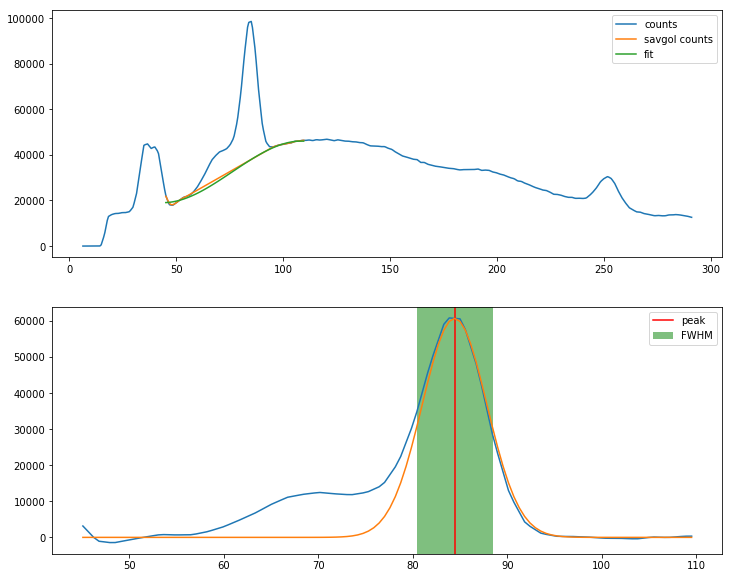

In [39]:
(peakmax1, fwhm1, peakpos1, sigma1), (peakmax2, fwhm2, peakpos2, sigma2), z = p_file("gigo", 'DET01_2013-03-29_06-56-16.TXT', 1, '.')

### pipeline

In [40]:
from datetime import datetime as dt

def read_1h_file(filepath):
    with open(filepath, 'r') as f:
        s = f.readlines()
        index = 0
        counts = numpy.zeros(2048)
        for line in s[4:]:
            count = line.strip().split()[1]
            counts[index] = count
            index += 1
    return counts, s[:4]
    

def write_file(header, new_E_scale, counts, outpath):
    for e, c in zip(new_E_scale, counts):
        header.append('%15.5f %10d\n' % (e, c))
        
    with open(outpath, 'w+') as f:
        f.writelines(header)


def write_peak_file(t1, t2, z_poly, filename, fi, outpath):
    
    (peakmax1, fwhm1, peakpos1, sigma1) = t1
    (peakmax2, fwhm2, peakpos2, sigma2) = t2
    #z
    
    lines = []
    datestring = dt.strptime(filename, "DET01_%Y-%m-%d_%H-%M-%S.TXT").strftime("%d/%m/%Y %H:%M:%S")
    lines.append(datestring+'\n')
    lines.append('peakmax, fwhm, center, sigma\n')
    #lines.append('%5.4f %5.4f %5.4f %5.4f\n' % t1)
    lines.append('%5.4f %5.4f %5.4f %5.4f\n' % t2)
    lines.append('polynom:')
    lines.append(' ax**3 + bx**2 + cx + d \n')
    lines.append('%10.9f %10.9f %10.9f %10.9f\n\n' % (z_poly[0], z_poly[1], z_poly[2], z_poly[3]))

    if fi == 0:
        with open(outpath, 'w+') as f:
            f.writelines(lines)
    else:
        with open(outpath, 'a') as f:
            f.writelines(lines)
        

def process_file(filedir, filename, fi, outdir):
    counts, header = read_1h_file(os.path.join(filedir, filename))
    xfilt = savgol_filter(counts, 5, 2)
    
    #do spectra shift
    peaks = find_peaks(xfilt)
    x = peaks
    y = corresponding_energies
    
    z = numpy.polyfit( x, y, 2)
    scalepoly = numpy.poly1d(z)
    new_E_scale = scalepoly(range(2048))
    
    try:
        t1, t2, z_poly = get_peak_twin81_poc(new_E_scale, counts, filename, plot=False)
    except:
        t1, t2, z_poly = (0,0,0,0), (0,0,0,0), (0,0,0,0)
        print "=====", filename, "Failed"
    #write_file(header, new_E_scale, counts, os.path.join(outdir, filename))
    write_peak_file(t1, t2, z_poly, filename, fi, os.path.join(outdir, 'peak_81', 'peaks_81_subbin.txt'))
    
    return t2[2], t2[0]
    

In [41]:
hourly_files_dir = os.path.join('hourly')
files = os.listdir(hourly_files_dir)

peak81_boxplot = []

for fi, fn in enumerate(files[:]):
    if not fi % 100: print(fi, fn)
    pos, value = process_file(hourly_files_dir, fn, fi, 'hourly_calib')
    peak81_boxplot.append((pos, value))
    

(0, 'DET01_2013-03-01_09-08-39.TXT')
(100, 'DET01_2013-03-05_13-55-25.TXT')
(200, 'DET01_2013-03-09_18-51-38.TXT')
(300, 'DET01_2013-03-13_23-39-44.TXT')
(400, 'DET01_2013-03-18_04-30-38.TXT')
(500, 'DET01_2013-03-22_09-24-25.TXT')
(600, 'DET01_2013-03-26_14-18-29.TXT')
===== DET01_2013-03-28_13-45-43.TXT Failed
(700, 'DET01_2013-03-30_19-17-52.TXT')
(800, 'DET01_2013-04-04_00-52-11.TXT')
(900, 'DET01_2013-04-08_05-41-50.TXT')
(1000, 'DET01_2013-04-12_10-31-25.TXT')
(1100, 'DET01_2013-04-16_15-18-35.TXT')
(1200, 'DET01_2013-04-20_20-06-02.TXT')
(1300, 'DET01_2013-04-25_01-02-53.TXT')
(1400, 'DET01_2013-04-29_05-50-36.TXT')
(1500, 'DET01_2013-05-03_11-28-52.TXT')
(1600, 'DET01_2013-05-07_16-18-22.TXT')
(1700, 'DET01_2013-05-11_21-09-45.TXT')
(1800, 'DET01_2013-05-16_02-01-30.TXT')
(1900, 'DET01_2013-05-20_07-01-21.TXT')
(2000, 'DET01_2013-05-24_11-53-04.TXT')
(2100, 'DET01_2013-05-28_16-40-43.TXT')
(2200, 'DET01_2013-06-01_22-19-27.TXT')
(2300, 'DET01_2013-06-06_03-07-16.TXT')
(2400, 'D

In [ ]:
peak81_boxplot = numpy.array(peak81_boxplot)
peak81_boxplot.shape
scipy.io.savemat('boxplots.m', {"p364": peak_364_boxplots,
                                "p250": peak250_boxplot,
                                "p662": peak662_boxplot,
                                "p81" : peak81_boxplot})